# Food Access in DC Final Project
### Maps produced by Emily Biro, Christopher Do, Brittney Lu, Rachel Seiberg

### Main research question: 
What is the overall food landscape for the City of Washington D.C.?

### Sub questions: 
Does healthy food access vary across wards? If so, how might this impact different demographics? Are there areas in the City of Washington D.C. that have greater access to healthy food? Are there areas in the City of Washington D.C. that have a higher concentration of unhealthy food options? Is there a visual relationship between DC demographics, food environments, and health outcomes? What are important indicators of healthy and unhealthy food access?

### Final assignment
For the final assignment, we have created a series of maps and charts to assess food acces in the City of Washington D.C. We begin with an initial ward map to situate the reader within the geographical context of Washington D.C. We have 5 static maps related to demographic data: 4 maps on race/ethnicity and 1 on median household income. We produced descriptive statistic charts on both the race/ethnicity breakdown and median household income at the ward level. We also created charts with descriptive statistics on age by ward. After seeing a clear demographic divide by ward, we wanted to analyze food access based on demographics and wards. We made a chart on the percentage of food insecure residents by ward.

After creating these maps, we were curious about what food access actually means in different wards. In order to answer this question, we produced charts that provide more detail on the types of stores available in different wards to paint a better picture of the quality of food access. We also made 3 interactive maps on the existing food landscapes: one map for "healthy" food, one map for "unhealthy" food, and one map on the distribution of grocery stores per 1,000 residents per ward. When considering this idea of food access, we wanted to consider mobility, so we mapped vehicle access by ward in both static maps and isochrone maps.

From this spatial analysis, we saw a number of factors that contribute to food disparity in D.C. However, we know that the city has many efforts to fight these disparities. As such, we mapped food interventions in an interactive map. 

In total, we produced 8 charts, 13 static maps, and 4 interactive maps.

Our final project is divided into 8 notebooks so that we did not overwhelm our notebook memory. 

Part 1 sets the stage of food access in DC by looking at ward demographic data. Part 2a assesses the existing food landscapes in DC. Part 2b furthers this exploration through spatial autocorrelation. Part 3 is broken down into 4 notebooks to analyze food access more directly. Part 3a looks at food access at a macro level. Part 3b specifically looks at food access in Ward 2 (high income, white community). Part 3c repeats Part 3b's process, this time in Ward 7 (low income, black community). Part 3d similarly repeats Part 3b logic, this time for Ward 8 (another low income, black community). This allows meaningful comparison of access, making the connection with race/ethnicity and income. Finally, Part 4 maps food interventions as a way to address the inequities we found throughout this project. 


### Data sources: 
Open Data DC and Social Explorer

* ACS Demographic Characteristics DC Ward 2022 ([Open Data DC](https://opendata.dc.gov/datasets/DCGIS::acs-demographic-characteristics-dc-ward/explore?location=38.893659%2C-77.014562%2C12.00)): DC income data by ward

* ACS Economic Characteristics DC Ward 2022 ([Open Data DC](https://opendata.dc.gov/datasets/DCGIS::acs-economic-characteristics-dc-ward/explore?location=38.890649%2C-77.031102%2C12.17)): DC income data by ward

* Age ([Open Data DC](https://opendata.dc.gov/datasets/058207022b5a4b57b593247178d9b42e_39/about)): Age data in DC

* Low food access areas ([Open Data DC](https://opendata.dc.gov/datasets/DCGIS::low-food-access-areas/explore): Low food access areas in DC

* Grocery Store Locations in DC, 2022 ([Open Data DC](https://opendata.dc.gov/datasets/DCGIS::grocery-store-locations/explore)): Grocery store locations in DC

* Farmer's Market Locations in DC, 2022 ([Open Data DC](https://opendata.dc.gov/datasets/farmers-market-locations/explore?location=38.897040%2C-77.005912%2C12.73)): Farmer's market locations in DC

* Community Gardens in DC, 2022 ([Open Data DC](https://opendata.dc.gov/datasets/DCGIS::community-gardens-1/explore?location=38.890751%2C-77.021832%2C12.22): Community garden locations in DC

* Fast food data indicator (self compiled through [Google Maps](https://www.google.com/search?rlz=1C5CHFA_enSG831SG831&q=washington+dc+fast+food&npsic=0&rflfq=1&rldoc=1&rllag=38903225,-77025571,2949&tbm=lcl&sa=X&ved=2ahUKEwiim7jbwOn9AhVJEUQIHSF6AlYQtgN6BAgQEAE): for "healthy" food (Subway and Chipotle). Also an indicator of "bad / unhealthy" food resource (other fast food restaurants like McDonald's etc).

* Liquor License Locations in DC, 2023 ([Open Data DC](https://opendata.dc.gov/datasets/DCGIS::liquor-licenses/explore?location=38.902497%2C-77.008884%2C12.43)): indicator for a "bad / unhealthy" food resource

* Healthy Corner Store Locations in DC, 2022 ([Open Data DC](https://opendata.dc.gov/datasets/healthy-corner-stores/explore)): Healthy corner store locations in DC

* Capital Area Food Bank Emergency Food Provider ([Open Data DC](https://opendata.dc.gov/datasets/DCGIS::capital-area-food-bank-emergency-food-provider/explore?location=38.890899%2C-77.026467%2C12.46)): indicator of a food intervention

* Summer Meal Sites ([Open Data DC](https://opendata.dc.gov/datasets/DCGIS::summer-meals-sites/about?uiVersion=content-views)): indicator of a food intervention, offering free meals to students during the summer

* Group Meal Centers ([Open Data DC](https://opendata.dc.gov/datasets/DCGIS::group-meal-centers/explore?location=38.890898%2C-77.026467%2C12.56)): indicator of a food intervention, offering free meals to the community

# Part 1: Demographic distribution

For our first notebook, we are looking at various demographic data for DC to set the stage in terms of median household income by ward, race/ethnicity by ward, and age by ward.

Before we get started, we need to import relevant data libraries (pandas, geopandas, folium, matplotlib, contextily, and plotly express)

In [1]:
#import data libraries
import pandas as pd
import geopandas as gpd
import folium
import matplotlib.pyplot as plt
import contextily as ctx
import plotly.express as px

## Providing context within the City of Washington D.C.
Washington D.C. is divided into 8 wards. We plan to conduct spatial analysis at the ward level, a common breakdown in the city. We will first situate this project in the geographical context by mapping Washington D.C.'s wards.

In [2]:
wards= gpd.read_file('Wards_from_2012.geojson') # import the data

In [3]:
wards.crs # check the data's projection

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

We need to change the ward projection so when we map it, it will produce a clean overlay

In [4]:
wards_wm = wards.to_crs(epsg=3857) #change projection

Now that we have changed our projection, we can plot wards on a map to see how wards are geographically located.

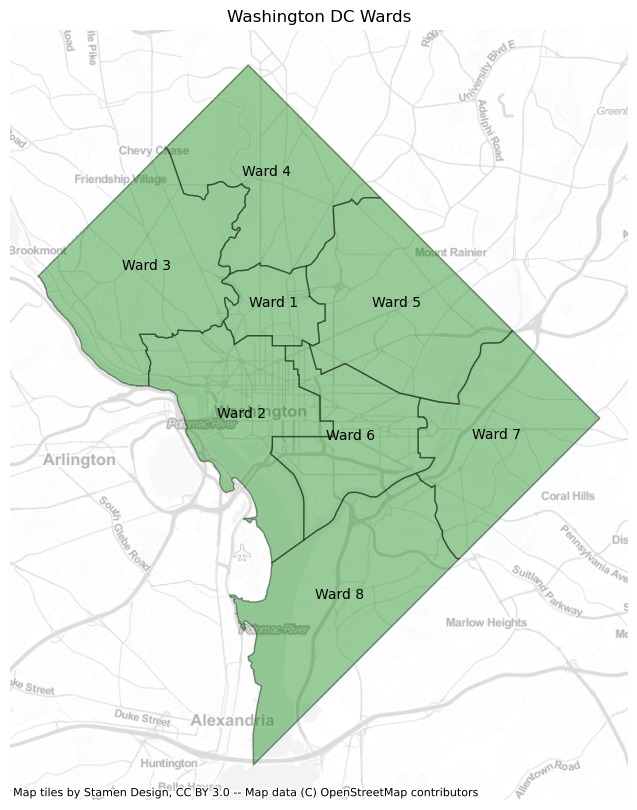

In [5]:
# plot our wards!
fig, ax = plt.subplots(figsize=(10,10))
wards_wm.plot(ax=ax,
              color='green',
              alpha=0.4,
              edgecolor='black')
wards_wm.apply(lambda x: ax.annotate(text=x['NAME'], xy=x.geometry.centroid.coords[0], ha='center'), axis=1);
ax.set_title('Washington DC Wards') # set axis title
ctx.add_basemap(ax=ax,
                source=ctx.providers.Stamen.TonerLite,
                alpha=0.3 # add transparency to make it less dominant
                )
ax.set_axis_off() # remove axis

This map shows Washington D.C.'s 8 wards, which will serve as our basis for the rest of our project.

##  Race and ethnicity by ward (from Open Data DC)
### Cleaning up the demographic data 
First, we need to explore our data (from Open Data DC) and trim it to make sure that we can merge data where needed

In order to explore data, we'll import data from Open Data DC

In [6]:
demog = gpd.read_file('demog.geojson') # import the data

Let's check out the column names of the data

In [7]:
demog.head(1)

OBJECTID STATEFP SLDUST  GEOID NAMELSAD     ALAND   AWATER     INTPTLAT  \
0         1      11    002  11002   Ward 2  16573627  5928027  +38.8926196   

       INTPTLON                          NAME  ...  DP05_0084E  DP05_0085E  \
0  -077.0427418  Ward 2, District of Columbia  ...         749        1609   

   DP05_0086E  DP05_0087E  DP05_0088E  DP05_0089E                     GIS_ID  \
0       43859       64742       31492       33250  ACS_Demographic_DC_Ward_2   

   SHAPEAREA  SHAPELEN                                           geometry  
0          0         0  POLYGON ((-77.08171 38.91744, -77.08173 38.917...  

[1 rows x 103 columns]

Woah these titles are weird... Let's view all column names to see what we're working with

In [8]:
# view all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
demog.head(2)

OBJECTID STATEFP SLDUST  GEOID NAMELSAD     ALAND   AWATER     INTPTLAT  \
0         1      11    002  11002   Ward 2  16573627  5928027  +38.8926196   
1         2      11    008  11008   Ward 8  22429470  8473345  +38.8390139   

       INTPTLON                          NAME  DP05_0001E  DP05_0002E  \
0  -077.0427418  Ward 2, District of Columbia       77923       37356   
1  -077.0071260  Ward 8, District of Columbia       85564       38976   

   DP05_0003E  DP05_0004E  DP05_0005E  DP05_0006E  DP05_0007E  DP05_0008E  \
0       40567        92.1        2307         719         650        6909   
1       46588        83.7        8314        6711        7167        5175   

   DP05_0009E  DP05_0010E  DP05_0011E  DP05_0012E  DP05_0013E  DP05_0014E  \
0       11779       22730       10141        6802        3554        3648   
1        6423       13961       10625        8714        4581        4913   

   DP05_0015E  DP05_0016E  DP05_0017E  DP05_0018E  DP05_0019E  DP05_0020E  \
0        5458        2531         695        32.0        4049       74203   
1        5874        2050        1056        30.7       25442       61808   

   DP05_0021E  DP05_0022E  DP05_0023E  DP05_0024E  DP05_0025E  DP05_0026E  \
0       73874       63967       10417        8684       73874       35762   
1       60122       56845       12010        8980       60122       26473   

   DP05_0027E  DP05_0028E  DP05_0029E  DP05_0030E  DP05_0031E  DP05_0032E  \
0       38112        93.8        8684        4080        4604        88.6   
1       33649        78.7        8980        3381        5599        60.4   

   DP05_0033E  DP05_0034E  DP05_0035E  DP05_0036E  DP05_0037E  DP05_0038E  \
0       77923       73822        4101       73822       57155        6434   
1       85564       82930        2634       82930        5938       74351   

   DP05_0039E  DP05_0040E  DP05_0041E  DP05_0042E  DP05_0043E  DP05_0044E  \
0         646          19           0           0           0        7607   
1         108          65           0           0           0         393   

   DP05_0045E  DP05_0046E  DP05_0047E  DP05_0048E  DP05_0049E  DP05_0050E  \
0        1926        2684         356         439        1055         392   
1          33          61         101           0         107           4   

   DP05_0051E  DP05_0052E  DP05_0053E  DP05_0054E  DP05_0055E  DP05_0056E  \
0         755          96           7          18           0          71   
1          87           8           2           3           0           3   

   DP05_0057E  DP05_0058E  DP05_0059E  DP05_0060E  DP05_0061E  DP05_0062E  \
0        1884        4101         693         156        1041           6   
1        2132        2634        1121         196         119         461   

   DP05_0063E  DP05_0064E  DP05_0065E  DP05_0066E  DP05_0067E  DP05_0068E  \
0       77923       60686        7530        1217        8970         235   
1       85564        7921       76368         948         697          59   

   DP05_0069E  DP05_0070E  DP05_0071E  DP05_0072E  DP05_0073E  DP05_0074E  \
0        3868       77923       10014        2065         883         479   
1        2590       85564        3545        1110         414          90   

   DP05_0075E  DP05_0076E  DP05_0077E  DP05_0078E  DP05_0079E  DP05_0080E  \
0        6587       67909       51495        6174         117        7486   
1        1931       82019        5051       73562          89         393   

   DP05_0081E  DP05_0082E  DP05_0083E  DP05_0084E  DP05_0085E  DP05_0086E  \
0          96         183        2358         749        1609       43859   
1           5         724        2195          20        2175       36167   

   DP05_0087E  DP05_0088E  DP05_0089E                     GIS_ID  SHAPEAREA  \
0       64742       31492       33250  ACS_Demographic_DC_Ward_2          0   
1       58850       25768       33082  ACS_Demographic_DC_Ward_8          0   

   SHAPELEN                                           geometry

Lots of confusing titles! Let's switch rename the relevant columns that we'll be keeping later on

In [9]:
# rename column titles to be easier to understand
demog.rename(columns={'NAMELSAD':'WARD'}, inplace=True),
demog.rename(columns={'INTPTLAT':'LATITUDE'}, inplace=True),
demog.rename(columns={'INTPTLON':'LONGITUDE'}, inplace=True),
demog.rename(columns={'DP05_0033E':'Total Population'}, inplace=True),
demog.rename(columns={'DP05_0035E':'Total Population, Two Races or more'}, inplace=True),
demog.rename(columns={'DP05_0077E':'White, Non Hispanic or Latino'}, inplace=True),
demog.rename(columns={'DP05_0078E':'Black, Non Hispanic or Latino'}, inplace=True),
demog.rename(columns={'DP05_0079E':'American Indian and Alaska Native, Non Hispanic or Latino'}, inplace=True),
demog.rename(columns={'DP05_0080E':'Asian, Non Hispanic or Latino'}, inplace=True),
demog.rename(columns={'DP05_0081E':'Native Hawaiian and Other Pacific Islander, Non Hispanic or Latino'}, inplace=True),
demog.rename(columns={'DP05_0082E':'Some Other Race, Non Hispanic or Latino'}, inplace=True),
demog.rename(columns={'DP05_0083E':'Two or More Races, Non Hispanic or Latino'}, inplace=True),
demog.rename(columns={'DP05_0071E':'Hispanic or Latino of Any Race'}, inplace=True),
demog.tail(1)

OBJECTID STATEFP SLDUST  GEOID    WARD     ALAND   AWATER     LATITUDE  \
7         8      11    003  11003  Ward 3  26946477  1316331  +38.9383001   

      LONGITUDE                          NAME  DP05_0001E  DP05_0002E  \
7  -077.0781397  Ward 3, District of Columbia       84651       38052   

   DP05_0003E  DP05_0004E  DP05_0005E  DP05_0006E  DP05_0007E  DP05_0008E  \
7       46599        81.7        4418        4428        3308        4758   

   DP05_0009E  DP05_0010E  DP05_0011E  DP05_0012E  DP05_0013E  DP05_0014E  \
7        6088       15864       12074       10328        4009        4230   

   DP05_0015E  DP05_0016E  DP05_0017E  DP05_0018E  DP05_0019E  DP05_0020E  \
7        7704        5294        2148        37.7       13814       71845   

   DP05_0021E  DP05_0022E  DP05_0023E  DP05_0024E  DP05_0025E  DP05_0026E  \
7       70837       66328       17932       15146       70837       31232   

   DP05_0027E  DP05_0028E  DP05_0029E  DP05_0030E  DP05_0031E  DP05_0032E  \
7       39605        78.9       15146        6354        8792        72.3   

   Total Population  DP05_0034E  Total Population, Two Races or more  \
7             84651       80634                                 4017   

   DP05_0036E  DP05_0037E  DP05_0038E  DP05_0039E  DP05_0040E  DP05_0041E  \
7       80634       65437        7141         209          77           0   

   DP05_0042E  DP05_0043E  DP05_0044E  DP05_0045E  DP05_0046E  DP05_0047E  \
7           8           0        6481        2360        1118         879   

   DP05_0048E  DP05_0049E  DP05_0050E  DP05_0051E  DP05_0052E  DP05_0053E  \
7         226         190         634        1074          56          12   

   DP05_0054E  DP05_0055E  DP05_0056E  DP05_0057E  DP05_0058E  DP05_0059E  \
7          35           0           9        1310        4017        1044   

   DP05_0060E  DP05_0061E  DP05_0062E  DP05_0063E  DP05_0064E  DP05_0065E  \
7          62        1714          71       84651       69146        8632   

   DP05_0066E  DP05_0067E  DP05_0068E  DP05_0069E  DP05_0070E  \
7         556        8407          62        2307       84651   

   Hispanic or Latino of Any Race  DP05_0072E  DP05_0073E  DP05_0074E  \
7                            8155        1363         502         762   

   DP05_0075E  DP05_0076E  White, Non Hispanic or Latino  \
7        5528       76496                          59616   

   Black, Non Hispanic or Latino  \
7                           6868   

   American Indian and Alaska Native, Non Hispanic or Latino  \
7                                                150           

   Asian, Non Hispanic or Latino  \
7                           6377   

   Native Hawaiian and Other Pacific Islander, Non Hispanic or Latino  \
7                                                 56                    

   Some Other Race, Non Hispanic or Latino  \
7                                      449   

   Two or More Races, Non Hispanic or Latino  DP05_0084E  DP05_0085E  \
7                                       2980          92        2888   

   DP05_0086E  DP05_0087E  DP05_0088E  DP05_0089E                     GIS_ID  \
7       40711       63600       28276       35324  ACS_Demographic_DC_Ward_3   

   SHAPEAREA  SHAPELEN                                           geometry  
7          0         0  POLYGON ((-77.11975 38.93436, -77.11976 38.934...

Looks good! Now let's make sure our demographic data is in the right projection for mapping

In [10]:
demog.crs #check projection

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

We're in the wrong projection so let's change that!

In [11]:
demog_wm = demog.to_crs(epsg=3857) #change projection

We don't need most of the columns in the data set. Let's define the columns we need and trim the data to keep only the necessary columns. We'll also perform a head function to make sure it worked

In [12]:
demog_columns_keep=['WARD', 'LATITUDE','LONGITUDE','Total Population', 'Total Population, Two Races or more','White, Non Hispanic or Latino','Black, Non Hispanic or Latino','American Indian and Alaska Native, Non Hispanic or Latino','Asian, Non Hispanic or Latino','Native Hawaiian and Other Pacific Islander, Non Hispanic or Latino','Some Other Race, Non Hispanic or Latino','Two or More Races, Non Hispanic or Latino','Hispanic or Latino of Any Race','geometry']

In [13]:
demog_trimmed = demog_wm[demog_columns_keep].copy() #create new data frame with trimmed data
demog_trimmed = demog_trimmed.dropna()
demog_trimmed.head(3)

WARD     LATITUDE     LONGITUDE  Total Population  \
0  Ward 2  +38.8926196  -077.0427418             77923   
1  Ward 8  +38.8390139  -077.0071260             85564   
2  Ward 6  +38.8866683  -077.0028435            101882   

   Total Population, Two Races or more  White, Non Hispanic or Latino  \
0                                 4101                          51495   
1                                 2634                           5051   
2                                 4228                          57364   

   Black, Non Hispanic or Latino  \
0                           6174   
1                          73562   
2                          28269   

   American Indian and Alaska Native, Non Hispanic or Latino  \
0                                                117           
1                                                 89           
2                                                157           

   Asian, Non Hispanic or Latino  \
0                           7486   
1                            393   
2                           4807   

   Native Hawaiian and Other Pacific Islander, Non Hispanic or Latino  \
0                                                 96                    
1                                                  5                    
2                                                  8                    

   Some Other Race, Non Hispanic or Latino  \
0                                      183   
1                                      724   
2                                      272   

   Two or More Races, Non Hispanic or Latino  Hispanic or Latino of Any Race  \
0                                       2358                           10014   
1                                       2195                            3545   
2                                       3060                            7945   

                                            geometry  
0  POLYGON ((-8580696.853 4709851.992, -8580698.4...  
1  POLYGON ((-8576945.384 4698960.838, -8576946.6...  
2  POLYGON ((-8575142.899 4704858.627, -8575203.4...

We can see all of the columns we need! Let's check out the trimmed data frame just to make sure

In [14]:
demog_trimmed.info(verbose=True, show_counts=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 14 columns):
 #   Column                                                              Non-Null Count  Dtype   
---  ------                                                              --------------  -----   
 0   WARD                                                                8 non-null      object  
 1   LATITUDE                                                            8 non-null      object  
 2   LONGITUDE                                                           8 non-null      object  
 3   Total Population                                                    8 non-null      int64   
 4   Total Population, Two Races or more                                 8 non-null      int64   
 5   White, Non Hispanic or Latino                                       8 non-null      int64   
 6   Black, Non Hispanic or Latino                                       8 non-null      int64   
 7   Amer

Now there's only the 14 columns we need. Great!

To draw comparisons of demographic distribution across and within wards, let's create a stacked chart. However, this cleaned dataset as-is does not allow us to create a grouped variable. So, our workaround includes manually reformatting our trimmed and sorted dataset to chart the number of residents per ward, color-coded by race and ethnicity. We created a separate spreadsheet, manually entered the data, and re-uploaded the following:

In [15]:
stack = pd.read_csv('demog_trimmed_stacked.csv') #import data

In [16]:
stack.head(10)

Ward                    Race and Ethnicity  Count
0     2                                 White  51495
1     2                                 Black   6174
2     2                    Hispanic or Latino  10014
3     2                                 Asian   7486
4     2     American Indian and Alaska Native    117
5     2  Native Hawaiian and Pacific Islander     96
6     2                                 Other    183
7     2                     Two or more Races   2358
8     8                                 White   5051
9     8                                 Black  73562

Now that the data frame has been adjusted (see above), we can create a bar chart where the x-axis represents the ward, the y-axis represents the population count, and the bars can be color-coded by race and ethnicity. Let's create the chart.

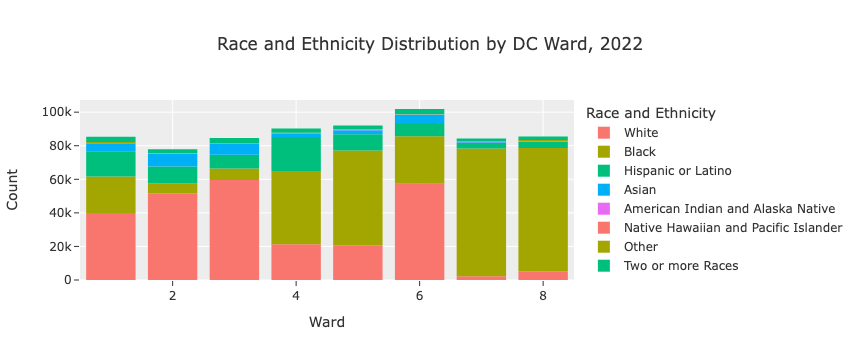

In [17]:
# create bar chart
fig = px.bar(stack,
             x='Ward',
             y='Count',
             color='Race and Ethnicity',
             title='Race and Ethnicity Distribution by DC Ward, 2022',
             template='ggplot2'
            )
fig.update_traces(marker_line_width=0)
fig.show()

Now, we can see how race and ethnicity is distributed within each ward and in comparison with one another, all in the same chart. Perhaps the most stark observation is the distribution between White and Black DC residents by ward. In Wards 1, 2, and 3, there is a disproportionately higher count of White residents whereas in Wards 7 and 8, there is a disproportionately higher count of Black residents. Here, we can see a relative distribution of residents by race and ethnicity, with clear distinctions between Black and White residents. This could be a preliminary indicator of racialized spatial segregation. 

Let's confirm this by spatially mapping concentrations of race/ethnicities by ward.

First, we'll need to add four new columns to assess the percent of the DC population based on ethnicity. We will look at black, white, asian, and hispanic. 

In [18]:
# creating percentages for race/ethnicity populations in relation to total population
demog_trimmed['Percent Black'] = demog_trimmed['Black, Non Hispanic or Latino']/demog_trimmed['Total Population']*100
demog_trimmed['Percent White'] = demog_trimmed['White, Non Hispanic or Latino']/demog_trimmed['Total Population']*100
demog_trimmed['Percent Hispanic, Latino'] = demog_trimmed['Hispanic or Latino of Any Race']/demog_trimmed['Total Population']*100
demog_trimmed['Percent Asian'] = demog_trimmed['Asian, Non Hispanic or Latino']/demog_trimmed['Total Population']*100

Let's see if the new columns show up:

In [19]:
demog_trimmed.head(1)

WARD     LATITUDE     LONGITUDE  Total Population  \
0  Ward 2  +38.8926196  -077.0427418             77923   

   Total Population, Two Races or more  White, Non Hispanic or Latino  \
0                                 4101                          51495   

   Black, Non Hispanic or Latino  \
0                           6174   

   American Indian and Alaska Native, Non Hispanic or Latino  \
0                                                117           

   Asian, Non Hispanic or Latino  \
0                           7486   

   Native Hawaiian and Other Pacific Islander, Non Hispanic or Latino  \
0                                                 96                    

   Some Other Race, Non Hispanic or Latino  \
0                                      183   

   Two or More Races, Non Hispanic or Latino  Hispanic or Latino of Any Race  \
0                                       2358                           10014   

                                            geometry  Percent Black  \
0  POLYGON ((-8580696.853 4709851.992, -8580698.4...       7.923206   

   Percent White  Percent Hispanic, Latino  Percent Asian  
0      66.084468                 12.851148        9.60692

We can see the new columns added at the end.

Now, we're able to map the race/ethnicity concentrations by ward. We are going to make 4 separate maps for each race/ethnicity of interest. For each map, we'll add a legend, lock it in place to the right of the map, choose a scheme, and make the data opaque over the basemap. We'll also create a title and remove the axis. In order to do all of this, we will need to define the number of bins because we want the same percent breakdowns for each race/ethnicity. This will allow us to have an accurate idea of how big each race/ethnicity population is in D.C.

In [20]:
bins = [0,25, 50,75,100] # define the number of bins we want in our maps so they're consistent across different race/ethnicity groups

### Mapping race and ethnicity
First we'll map the percent black population in D.C. by ward

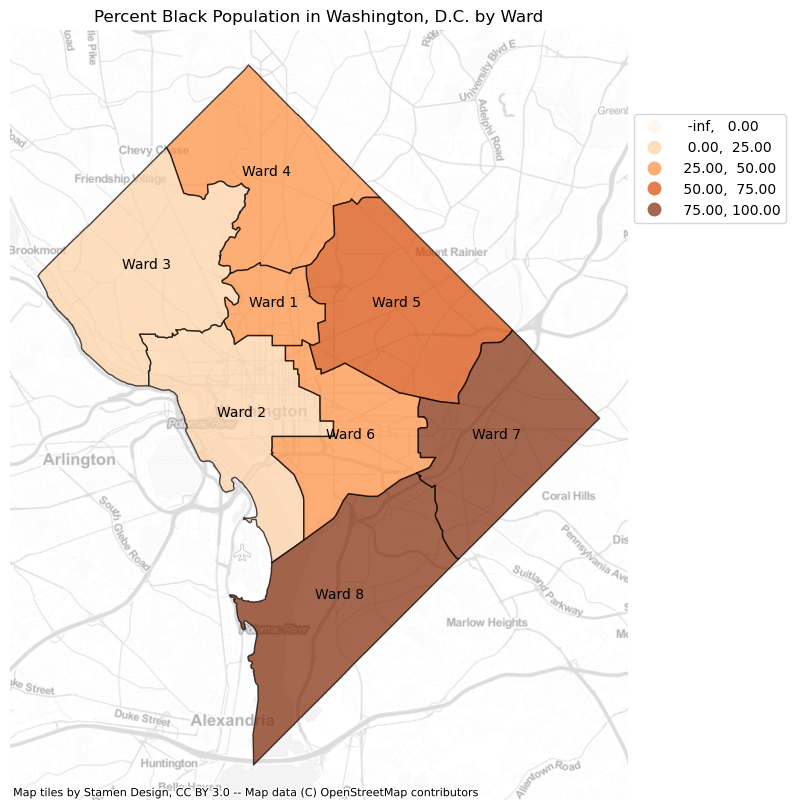

In [21]:
# mapping percent black population
fig, ax = plt.subplots(figsize=(10,10))
demog_trimmed.plot(figsize=(12,10), # plot the data
                   column='Percent Black',
                   legend=True, 
                   cmap="Oranges",
                   ax=ax,
                   legend_kwds={'loc':'upper left','bbox_to_anchor':(1,.9)},
                   edgecolor='black',
                   alpha=0.7,
                   scheme='user_defined', 
                   classification_kwds={'bins': bins}
)   
demog_trimmed.apply(lambda x: ax.annotate(text=x['WARD'], xy=x.geometry.centroid.coords[0], ha='center'), axis=1);
ax.set_title("Percent Black Population in Washington, D.C. by Ward") # set axis title
ctx.add_basemap(ax=ax,
                source=ctx.providers.Stamen.TonerLite,
                alpha=0.3 # add transparency to make it less dominant
                )
ax.set_axis_off() # remove axis

This map shows that the SE quadrant of D.C. has a noticably high concentration of black people. Wards 7 and 8 have over 75% black populations, while Wards 2 and 3 have 25% of less black people in their population. There is a clear divide between east and west, in which there are significantly more black individuals living in the eastern region of the city.

Next, we'll make the same map for percent white population.

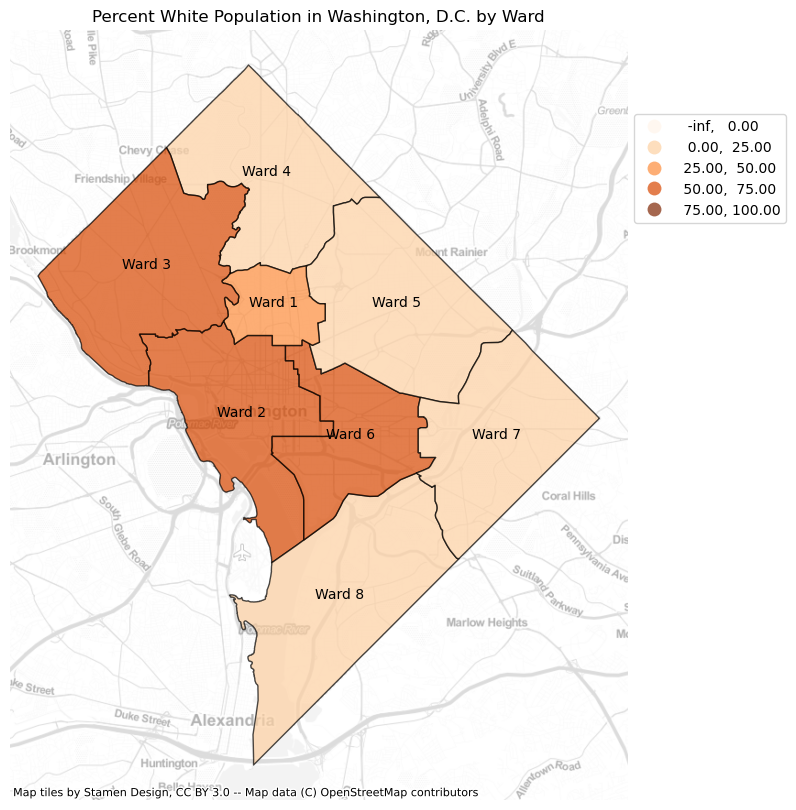

In [22]:
# percent white population
fig, ax = plt.subplots(figsize=(10,10))
demog_trimmed.plot(figsize=(12,10), # plot the data
                   column='Percent White',
                   legend=True, 
                   cmap="Oranges",
                   ax=ax,
                   legend_kwds={'loc':'upper left','bbox_to_anchor':(1,.9)},
                   edgecolor='black',
                   alpha=0.7,
                   scheme='user_defined', 
                   classification_kwds={'bins': bins}
)      
demog_trimmed.apply(lambda x: ax.annotate(text=x['WARD'], xy=x.geometry.centroid.coords[0], ha='center'), axis=1);
ax.set_title("Percent White Population in Washington, D.C. by Ward") # set axis title
ctx.add_basemap(ax=ax,
                source=ctx.providers.Stamen.TonerLite,
                alpha=0.3 # add transparency to make it less dominant
                )
ax.set_axis_off() # remove axis

This map shows that the NW quadrant of D.C. has a noticably high concentration of white people. Wards 2. 3, and 6 have the most white people, where 50-75% of their population are white. By contrast, Wards 4, 5, 7, and 8 on the east side have less than 25% white populations. This further confirms that D.C. is pretty segregated based on race/ethnicity.

Up next is the spatial distribution of asians in D.C.

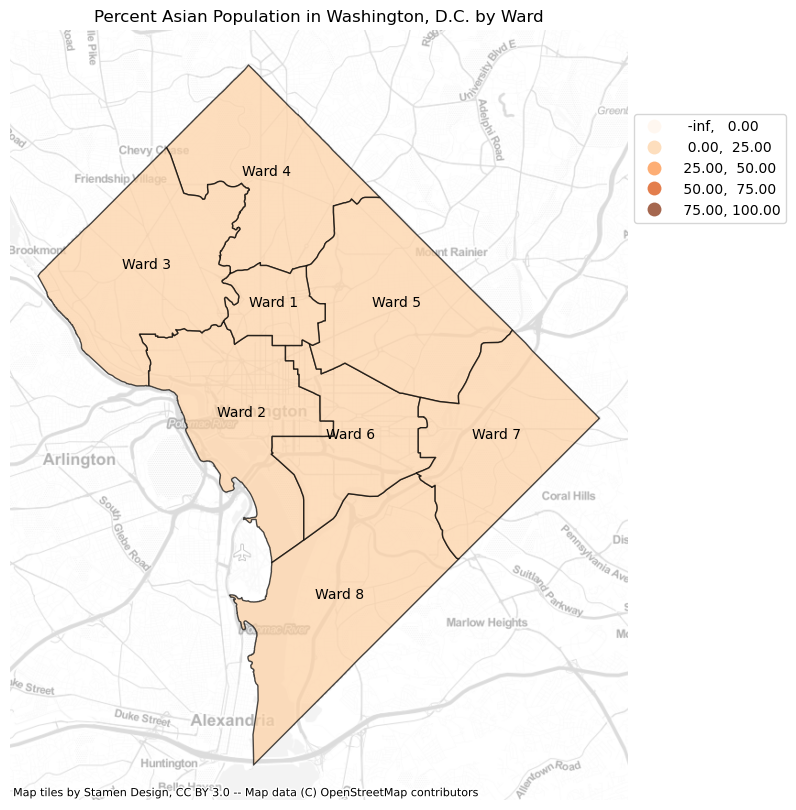

In [23]:
# percent asian population
fig, ax = plt.subplots(figsize=(10,10))
demog_trimmed.plot(figsize=(12,10), # plot the data
                   column='Percent Asian',
                   legend=True, 
                   cmap="Oranges",
                   ax=ax,
                   legend_kwds={'loc':'upper left','bbox_to_anchor':(1,.9)},
                    edgecolor='black',
                   alpha=0.7,
                   scheme='user_defined', 
                   classification_kwds={'bins': bins}
)   
demog_trimmed.apply(lambda x: ax.annotate(text=x['WARD'], xy=x.geometry.centroid.coords[0], ha='center'), axis=1);
ax.set_title("Percent Asian Population in Washington, D.C. by Ward") # set axis title
ctx.add_basemap(ax=ax,
                source=ctx.providers.Stamen.TonerLite,
                alpha=0.3 # add transparency to make it less dominant
                )
ax.set_axis_off() # remove axis

There is a small asian population in D.C. throughout all wards, with less than 25% of total populations in each ward identifying as asian.

Finally, we'll create the same map for hispanic/ latinos.

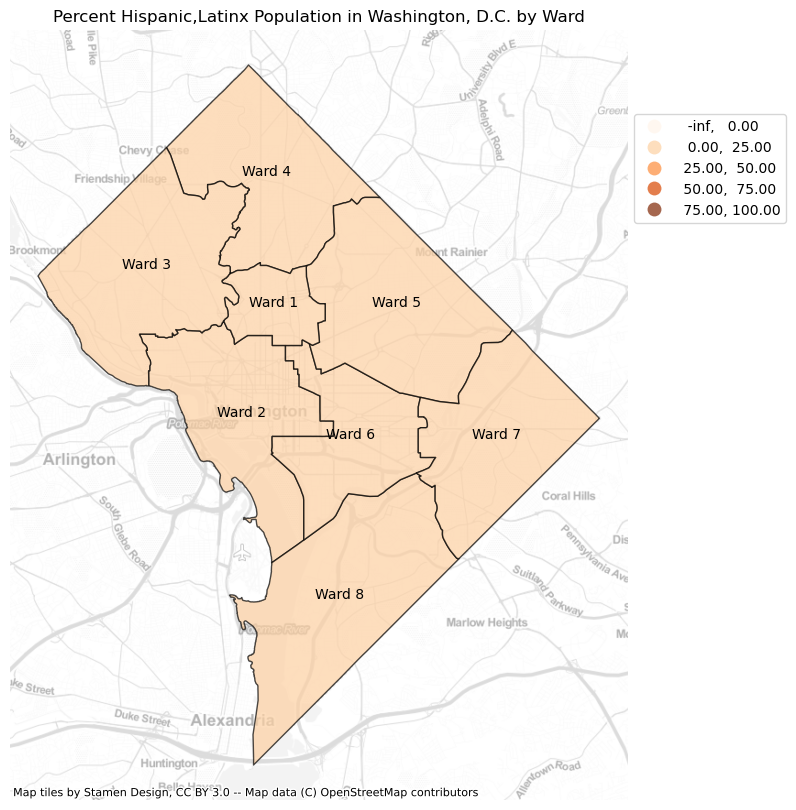

In [24]:
# percent hispanic/latino
fig, ax = plt.subplots(figsize=(10,10))
demog_trimmed.plot(figsize=(12,10), # plot the data
                   column='Percent Hispanic, Latino',
                   legend=True, 
                   cmap="Oranges",
                   ax=ax,
                   legend_kwds={'loc':'upper left','bbox_to_anchor':(1,.9)},
                    edgecolor='black',
                   alpha=0.7,
                   scheme='user_defined', 
                   classification_kwds={'bins': bins}
)     
demog_trimmed.apply(lambda x: ax.annotate(text=x['WARD'], xy=x.geometry.centroid.coords[0], ha='center'), axis=1);
ax.set_title("Percent Hispanic,Latinx Population in Washington, D.C. by Ward") # set axis title
ctx.add_basemap(ax=ax,
                source=ctx.providers.Stamen.TonerLite,
                alpha=0.3 # add transparency to make it less dominant
                )
ax.set_axis_off() # remove axis

Like asians, hispanic/latinos make up a very small portion of residents in D.C. All wards have populations below 25%.

Overall, we can see that there is a relatively even dispersion of asian and hispanic/latinos compared to black and white folks. D.C. is highly segregated between black and white people, with black people  residing in high concentrations in eastern wards, while white people live in western wards.

## Income distribution (median household income) by ward (Open Data DC)
Based on this spatial distribution of race and ethnicity in DC, we posit that we would see a similar picture based on median household income. In order to assess this, we duplicated these some of the steps from race/ethnicity, this time for median household income.

### Cleaning up the data
Let's assess the economic landscape of D.C. We'll do this by charting and mapping median household income. First, we need to explore our data (from Open Data DC) and trim it to make sure that we can merge data where needed

In order to explore data, we'll input data from Open Data DC looking at income by ward

In [25]:
income= gpd.read_file('econ_ward.geojson') # import the data

Let's check out the column names of the data, since some of the columns from the demographic data had funky names

In [26]:
income.head(2)

OBJECTID STATEFP SLDUST  GEOID NAMELSAD     ALAND   AWATER     INTPTLAT  \
0         1      11    002  11002   Ward 2  16573627  5928027  +38.8926196   
1         2      11    008  11008   Ward 8  22429470  8473345  +38.8390139   

       INTPTLON                          NAME  DP03_0001  DP03_0002  \
0  -077.0427418  Ward 2, District of Columbia      74203      52550   
1  -077.0071260  Ward 8, District of Columbia      61808      38346   

   DP03_0003  DP03_0004  DP03_0005  DP03_0006  DP03_0007  DP03_0008  \
0      52284      50504       1780        266      21653      52284   
1      36998      30560       6438       1348      23462      36998   

   DP03_0009P  DP03_0010  DP03_0011  DP03_0012  DP03_0013  DP03_0014  \
0         3.4      38367      26815      26705      25743       2366   
1        17.4      34588      20986      20823      17360       9476   

   DP03_0015  DP03_0016  DP03_0017  DP03_0018  DP03_0019  DP03_0020  \
0       1697       1456       1102      49864       8382       1050   
1       6921      14322      10382      31111      14130       2133   

   DP03_0021  DP03_0022  DP03_0023  DP03_0024  DP03_0025  DP03_0026  \
0      11299      18760       3813       6560       23.9      50504   
1      11568       1023        727       1530       36.0      30560   

   DP03_0027  DP03_0028  DP03_0029  DP03_0030  DP03_0031  DP03_0032  \
0      39246       3353       6980        327        598      50504   
1      10332       8488       7368       1358       3014      30560   

   DP03_0033  DP03_0034  DP03_0035  DP03_0036  DP03_0037  DP03_0038  \
0         46        803        577        257       1476        425   
1         59       1451        285        505       2700       2450   

   DP03_0039  DP03_0040  DP03_0041  DP03_0042  DP03_0043  DP03_0044  \
0       1937       4913      15851       8703       3080       4968   
1        379       1678       4557       6231       4451       1801   

   DP03_0045  DP03_0046  DP03_0047  DP03_0048  DP03_0049  DP03_0050  \
0       7468      50504      38057      10359       1956        132   
1       4013      30560      21766       8161        603         30   

   DP03_0051  DP03_0052  DP03_0053  DP03_0054  DP03_0055  DP03_0056  \
0      38857       2611        831       1231       1224       1695   
1      32194       5473       2672       3480       3522       4450   

   DP03_0057  DP03_0058  DP03_0059  DP03_0060  DP03_0061  DP03_0062  \
0       4752       4064       7752       4342      10355     114649   
1       3834       2941       3013       1552       1257      37963   

   DP03_0063  DP03_0064  DP03_0065  DP03_0066  DP03_0067  DP03_0068  \
0     165977      33658     166783       5735      20729       4337   
1      62260      23049      70274       7543      11331       4651   

   DP03_0069  DP03_0070  DP03_0071  DP03_0072  DP03_0073  DP03_0074  \
0      52421        693       9305        150       3809       1335   
1      30040       3986       9384       2900       3411      11237   

   DP03_0075  DP03_0076  DP03_0077  DP03_0078  DP03_0079  DP03_0080  \
0       9337        115         23        190        121        232   
1      16493       2381       1027       1589       1676       2341   

   DP03_0081  DP03_0082  DP03_0083  DP03_0084  DP03_0085  DP03_0086  \
0        501        496       1387       1258       5014     212937   
1       2302       1801       1759        953        664      43617   

   DP03_0087  DP03_0088  DP03_0089  DP03_0090  DP03_0091  DP03_0092  \
0     269705      85777      29520     100006     131992      70133   
1      66731      25573      15701      32092      54725      33644   

   DP03_0093  DP03_0094  DP03_0095  DP03_0096  DP03_0097  DP03_0098  \
0     108056      87384      77425      75644      70048      11674   
1      43856      50195      82781      79410      34745      52653   

   DP03_0099  DP03_0100  DP03_0101  DP03_0102  DP03_0103  DP03_0104  \
0       1781       6836         20      62065      48273

Again these titles are weird... Let's view all column names to see what we're working with

In [27]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
income.head(2)

OBJECTID STATEFP SLDUST  GEOID NAMELSAD     ALAND   AWATER     INTPTLAT  \
0         1      11    002  11002   Ward 2  16573627  5928027  +38.8926196   
1         2      11    008  11008   Ward 8  22429470  8473345  +38.8390139   

       INTPTLON                          NAME  DP03_0001  DP03_0002  \
0  -077.0427418  Ward 2, District of Columbia      74203      52550   
1  -077.0071260  Ward 8, District of Columbia      61808      38346   

   DP03_0003  DP03_0004  DP03_0005  DP03_0006  DP03_0007  DP03_0008  \
0      52284      50504       1780        266      21653      52284   
1      36998      30560       6438       1348      23462      36998   

   DP03_0009P  DP03_0010  DP03_0011  DP03_0012  DP03_0013  DP03_0014  \
0         3.4      38367      26815      26705      25743       2366   
1        17.4      34588      20986      20823      17360       9476   

   DP03_0015  DP03_0016  DP03_0017  DP03_0018  DP03_0019  DP03_0020  \
0       1697       1456       1102      49864       8382       1050   
1       6921      14322      10382      31111      14130       2133   

   DP03_0021  DP03_0022  DP03_0023  DP03_0024  DP03_0025  DP03_0026  \
0      11299      18760       3813       6560       23.9      50504   
1      11568       1023        727       1530       36.0      30560   

   DP03_0027  DP03_0028  DP03_0029  DP03_0030  DP03_0031  DP03_0032  \
0      39246       3353       6980        327        598      50504   
1      10332       8488       7368       1358       3014      30560   

   DP03_0033  DP03_0034  DP03_0035  DP03_0036  DP03_0037  DP03_0038  \
0         46        803        577        257       1476        425   
1         59       1451        285        505       2700       2450   

   DP03_0039  DP03_0040  DP03_0041  DP03_0042  DP03_0043  DP03_0044  \
0       1937       4913      15851       8703       3080       4968   
1        379       1678       4557       6231       4451       1801   

   DP03_0045  DP03_0046  DP03_0047  DP03_0048  DP03_0049  DP03_0050  \
0       7468      50504      38057      10359       1956        132   
1       4013      30560      21766       8161        603         30   

   DP03_0051  DP03_0052  DP03_0053  DP03_0054  DP03_0055  DP03_0056  \
0      38857       2611        831       1231       1224       1695   
1      32194       5473       2672       3480       3522       4450   

   DP03_0057  DP03_0058  DP03_0059  DP03_0060  DP03_0061  DP03_0062  \
0       4752       4064       7752       4342      10355     114649   
1       3834       2941       3013       1552       1257      37963   

   DP03_0063  DP03_0064  DP03_0065  DP03_0066  DP03_0067  DP03_0068  \
0     165977      33658     166783       5735      20729       4337   
1      62260      23049      70274       7543      11331       4651   

   DP03_0069  DP03_0070  DP03_0071  DP03_0072  DP03_0073  DP03_0074  \
0      52421        693       9305        150       3809       1335   
1      30040       3986       9384       2900       3411      11237   

   DP03_0075  DP03_0076  DP03_0077  DP03_0078  DP03_0079  DP03_0080  \
0       9337        115         23        190        121        232   
1      16493       2381       1027       1589       1676       2341   

   DP03_0081  DP03_0082  DP03_0083  DP03_0084  DP03_0085  DP03_0086  \
0        501        496       1387       1258       5014     212937   
1       2302       1801       1759        953        664      43617   

   DP03_0087  DP03_0088  DP03_0089  DP03_0090  DP03_0091  DP03_0092  \
0     269705      85777      29520     100006     131992      70133   
1      66731      25573      15701      32092      54725      33644   

   DP03_0093  DP03_0094  DP03_0095  DP03_0096  DP03_0097  DP03_0098  \
0     108056      87384      77425      75644      70048      11674   
1      43856      50195      82781      79410      34745      52653   

   DP03_0099  DP03_0100  DP03_0101  DP03_0102  DP03_0103  DP03_0104  \
0       1781       6836         20      62065      48273

Again, lots of confusing titles! Let's switch rename the relevant columns that we'll be keeping later on

In [28]:
# rename column titles 
income.rename(columns={'NAMELSAD':'WARD'}, inplace=True),
income.rename(columns={'INTPTLAT':'LATITUDE'}, inplace=True),
income.rename(columns={'INTPTLON':'LONGITUDE'}, inplace=True),
income.rename(columns={'DP03_0051':'Total Households'}, inplace=True),
income.rename(columns={'DP03_0086':'Median Household Income'}, inplace=True),
income.tail(1)

OBJECTID STATEFP SLDUST  GEOID    WARD     ALAND   AWATER     LATITUDE  \
7         8      11    003  11003  Ward 3  26946477  1316331  +38.9383001   

      LONGITUDE                          NAME  DP03_0001  DP03_0002  \
7  -077.0781397  Ward 3, District of Columbia      71845      50513   

   DP03_0003  DP03_0004  DP03_0005  DP03_0006  DP03_0007  DP03_0008  \
7      50383      48421       1962        130      21332      50383   

   DP03_0009P  DP03_0010  DP03_0011  DP03_0012  DP03_0013  DP03_0014  \
7         3.9      40098      27539      27539      26387       5114   

   DP03_0015  DP03_0016  DP03_0017  DP03_0018  DP03_0019  DP03_0020  \
7       4476       8500       6542      47756      17616       1927   

   DP03_0021  DP03_0022  DP03_0023  DP03_0024  DP03_0025  DP03_0026  \
7      14093       3789       2450       7881       28.6      48421   

   DP03_0027  DP03_0028  DP03_0029  DP03_0030  DP03_0031  DP03_0032  \
7      38375       3497       5595        446        508      48421   

   DP03_0033  DP03_0034  DP03_0035  DP03_0036  DP03_0037  DP03_0038  \
7         40        761        449        309       1282        349   

   DP03_0039  DP03_0040  DP03_0041  DP03_0042  DP03_0043  DP03_0044  \
7       2025       3871      13102      10456       2783       4598   

   DP03_0045  DP03_0046  DP03_0047  DP03_0048  DP03_0049  DP03_0050  \
7       8396      48421      33138      11610       3529        144   

   Total Households  DP03_0052  DP03_0053  DP03_0054  DP03_0055  DP03_0056  \
7             37508       1957        794       1098       1243       1428   

   DP03_0057  DP03_0058  DP03_0059  DP03_0060  DP03_0061  DP03_0062  \
7       4079       4016       6481       4172      12240     129681   

   DP03_0063  DP03_0064  DP03_0065  DP03_0066  DP03_0067  DP03_0068  \
7     204952      30660     203135       8488      24994       7711   

   DP03_0069  DP03_0070  DP03_0071  DP03_0072  DP03_0073  DP03_0074  \
7      57667        477       8300        312       4291        625   

   DP03_0075  DP03_0076  DP03_0077  DP03_0078  DP03_0079  DP03_0080  \
7      17312        282         94        123        136        118   

   DP03_0081  DP03_0082  DP03_0083  DP03_0084  DP03_0085  \
7        822        923       2348       2411      10055   

   Median Household Income  DP03_0087  DP03_0088  DP03_0089  DP03_0090  \
7                   236960     318022      94151      20196      82918   

   DP03_0091  DP03_0092  DP03_0093  DP03_0094  DP03_0095  DP03_0096  \
7     104704      75225     122386      91619      84214      82791   

   DP03_0097  DP03_0098  DP03_0099  DP03_0100  DP03_0101  DP03_0102  \
7      75982      17700       1423      15421        219      53869   

   DP03_0103  DP03_0104  DP03_0105  DP03_0106  DP03_0107  DP03_0108  \
7      45165      43517      42765      41566       1568        752   

   DP03_0109  DP03_0110  DP03_0111  DP03_0112  DP03_0113  DP03_0114  \
7       1648       1605       1365        278         43       8704   

   DP03_0115  DP03_0116  DP03_0117  DP03_0118  DP03_0119P  DP03_0120P  \
7       8354       7418       1138        350         2.3         1.9   

   DP03_0121P  DP03_0122P  DP03_0123P  DP03_0124P  DP03_0125P  DP03_0126P  \
7         1.6         1.2         1.1         0.0         8.6         3.2   

   DP03_0127P  DP03_0128P  DP03_0129P  DP03_0130P  DP03_0131P  DP03_0132P  \
7        19.0         8.0         1.8         1.6         1.1         1.8   

   DP03_0133P  DP03_0134P  DP03_0135P  DP03_0136P  DP03_0137P  SHAPEAREA  \
7         9.3        10.4         5.4         2.1        17.9          0   

   SHAPELEN                                           geometry  
7         0  POLYGON ((-77.11975 38.93436, -77.11976 38.934...

Looks good! Now let's make sure our demographic data is in the right projection

In [29]:
income.crs #check projection

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

We're in the wrong projection so let's change that!

In [30]:
income_wm = income.to_crs(epsg=3857) #change projection

We don't need most of the columns in the data set. Let's define the columns we need and trim the data to keep only the necessary columns. We'll also perform a head function to make sure it worked

In [31]:
# keep necessary columns only
income_columns_keep=['WARD','LATITUDE','LONGITUDE','Median Household Income','geometry']

In [32]:
income_trimmed = income_wm[income_columns_keep].copy() #create new data frame with trimmed data
income_trimmed = income_trimmed.dropna()
income_trimmed.head(3)

WARD     LATITUDE     LONGITUDE  Median Household Income  \
0  Ward 2  +38.8926196  -077.0427418                   212937   
1  Ward 8  +38.8390139  -077.0071260                    43617   
2  Ward 6  +38.8866683  -077.0028435                   169889   

                                            geometry  
0  POLYGON ((-8580696.853 4709851.992, -8580698.4...  
1  POLYGON ((-8576945.384 4698960.838, -8576946.6...  
2  POLYGON ((-8575142.899 4704858.627, -8575203.4...

We can see all of the columns we need! Let's check out the trimmed data frame just to make sure

In [33]:
income_trimmed.info(verbose=True, show_counts=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   WARD                     8 non-null      object  
 1   LATITUDE                 8 non-null      object  
 2   LONGITUDE                8 non-null      object  
 3   Median Household Income  8 non-null      int64   
 4   geometry                 8 non-null      geometry
dtypes: geometry(1), int64(1), object(3)
memory usage: 448.0+ bytes


Now there's only the 5 columns we need. Great!

We'll also sort the data so that the wards are listed in ascending order. This will just help with visual clarity.

In [34]:
income_trimmed_ward = income_trimmed.sort_values(by='WARD',ascending=True)
income_trimmed_ward.head(10)

WARD     LATITUDE     LONGITUDE  Median Household Income  \
6  Ward 1  +38.9252533  -077.0310006                   156250   
0  Ward 2  +38.8926196  -077.0427418                   212937   
7  Ward 3  +38.9383001  -077.0781397                   236960   
3  Ward 4  +38.9638701  -077.0343018                   128064   
4  Ward 5  +38.9255091  -076.9853522                   100981   
2  Ward 6  +38.8866683  -077.0028435                   169889   
5  Ward 7  +38.8877542  -076.9488101                    56669   
1  Ward 8  +38.8390139  -077.0071260                    43617   

                                            geometry  
6  POLYGON ((-8577253.740 4712081.482, -8577262.0...  
0  POLYGON ((-8580696.853 4709851.992, -8580698.4...  
7  POLYGON ((-8584931.670 4712273.246, -8584932.5...  
3  POLYGON ((-8579576.756 4717632.081, -8579569.0...  
4  POLYGON ((-8573742.165 4712614.424, -8573741.7...  
2  POLYGON ((-8575142.899 4704858.627, -8575203.4...  
5  POLYGON ((-8569155.466 4704052.258, -8568999.1...  
1  POLYGON ((-8576945.384 4698960.838, -8576946.6...

Now that we have our trimmed and sorted variable for income, let's chart it! We want to create a visual that shows median household income by ward.

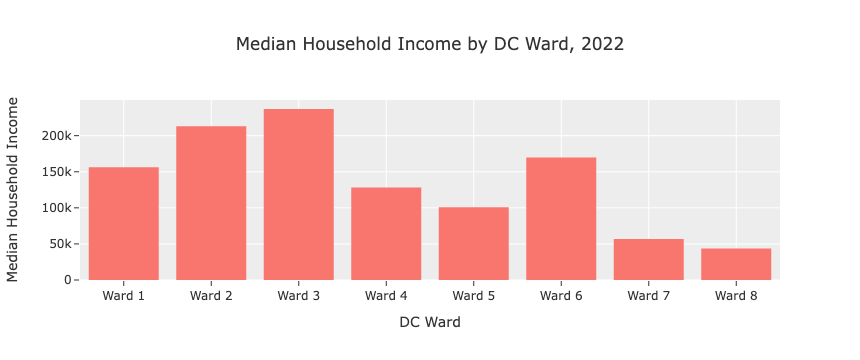

In [35]:
fig = px.bar(income_trimmed_ward,
             x='WARD',
             y='Median Household Income',
             title='Median Household Income by DC Ward, 2022',
             labels={
                 'WARD':'DC Ward'
             },
             template='ggplot2'
            )
fig.update_traces(marker_line_width=0)
fig.show()

This chart is an indicator that the wards with the highest median household income are Wards 2 and 3, with Ward 3 residents' median household income surpassing two hundered thousand dollars. In stark comparison, Wards 7 and 8 have the lowest median household income, with Ward 8 residents' median household income falling below fifty thousand dollars, making the absolute difference in median household income per ward around one hundred and fifty thousand dollars. Based on the various charts generated here, we have a better understanding of what the population characteristics of each ward are. We are observing that some of the wealthier wards also have more White residents whereas some of the poorer wards also have more Black residents. In subsequent maps and coding, we'll explore whether there is a relationship between these population characteristics and the food environment.

### Mapping median household income
Now, we're able to map the median household income by ward. We'll add a legend, lock it in place to the right of the map, chose a color scheme, and make the data opaque over the basemap. We'll also create a title and remove the axis 

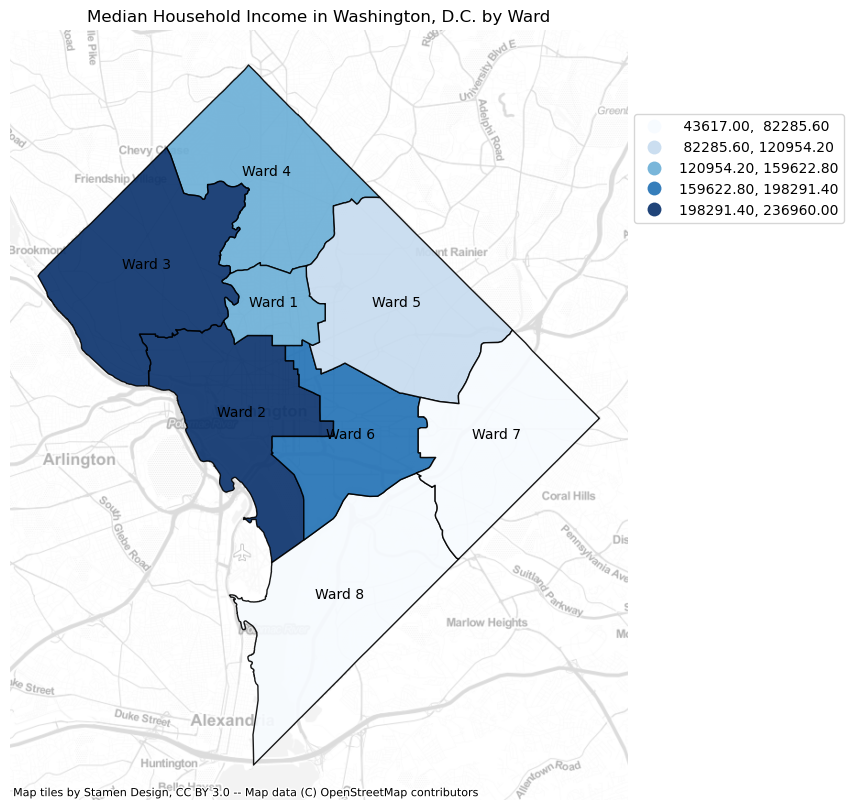

In [36]:
fig, ax = plt.subplots(figsize=(10,10))
income_trimmed.plot(figsize=(12,10), # plot the data
                 column='Median Household Income',
                 legend=True, 
                 cmap="Blues",
                 ax=ax,
                 legend_kwds={'loc':'upper left','bbox_to_anchor':(1,.9)},
                 edgecolor='black',
                 scheme='equal_interval', alpha=0.9)         
income_trimmed.apply(lambda x: ax.annotate(text=x['WARD'], xy=x.geometry.centroid.coords[0], ha='center'), axis=1);
ax.set_title('Median Household Income in Washington, D.C. by Ward') # set axis title
ctx.add_basemap(ax=ax,
                source=ctx.providers.Stamen.TonerLite,
                alpha=0.3 # add transparency to make it less dominant
                )
ax.set_axis_off() # remove axis

This map shows that the SE quadrant of D.C. has the lowest median household income. More specifically, wards 7 and 8 in the SE have the lowest median household income. Similar to the demographic distribution in part 1, there is a stark divide between east and west, where there is a significantly lower median household income in eastern wards of the city compared to western wards. 

### Food access and security 
Let's now conduct some data exploration, cleaning, and charting for low food access areas. [In this dataset](https://opendata.dc.gov/datasets/DCGIS::low-food-access-areas/about), low food access areas are defined as those where "it is estimated to take more than a ten minute walk to access a full-service grocery store," and food insecurity is defined by those living in a low food access area and having a houshold income 185% lower than the Federal Poverty Line. We'll start by importing the relevant dataset and then conducting some cleaning. 

In [37]:
# import food access csv data
access = pd.read_csv('Low_Food_Access_Areas.csv')

In [38]:
access.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   OBJECTID       381 non-null    int64  
 1   FID_GROCER     381 non-null    int64  
 2   FID_GROC_1     381 non-null    int64  
 3   FACILITYID     381 non-null    int64  
 4   FID_POV_AC     381 non-null    int64  
 5   GEOID          381 non-null    int64  
 6   FIRST_TOTA     381 non-null    int64  
 7   FIRST_UNDE     381 non-null    int64  
 8   FIRST_OVER     381 non-null    int64  
 9   POPAREA        381 non-null    float64
 10  SHAPE_LENG     381 non-null    float64
 11  PARTPOP        381 non-null    int64  
 12  PARTUNDER1     381 non-null    int64  
 13  PARTOVER18     381 non-null    int64  
 14  PARTAREA       381 non-null    float64
 15  AREARATIO      381 non-null    float64
 16  GROCERYACC     381 non-null    object 
 17  FID_WARDPL     381 non-null    int64  
 18  WARD      

Based on the available [data dictionary](https://opendata.dc.gov/datasets/DCGIS::low-food-access-areas/about), we want to trim and rename select columns to concentrate only on geographic boundary (ward) and food access and insecurity variables, as well as the geometry for mapping.

In [39]:
# trim for only necessary columns
access = access[['WARD','PARTPOP2','PRTOVR185','PRTUND185','PERCENTUND185']]

In [40]:
# rename columns
access.rename(columns={'PARTPOP2':'Total Population',
                       'PRTOVR185':'Income Above FPL',
                       'PRTUND185':'Income Below FPL',
                       'PERCENTUND185':'Percent Food Insecure'                       
                      }, inplace=True)
access.tail(1)# rename

WARD  Total Population  Income Above FPL  Income Below FPL  \
380     8              2171               947              1224   

     Percent Food Insecure  
380               0.563796

Now that we have a cleaned dataset, let's chart percentage of food insecurity by ward.

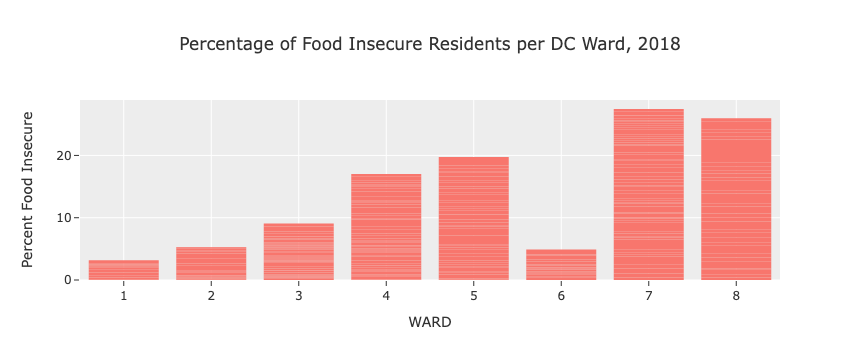

In [41]:
fig = px.bar(access,
             x='WARD',
             y='Percent Food Insecure',
             title='Percentage of Food Insecure Residents per DC Ward, 2018',
             template='ggplot2'
            )
fig.update_traces(marker_line_width=0)
fig.show()

There's a pretty stark contrast in how food insecurity is experienced across ward as well. Wards 1-3 experience the lowest percentage of food insecurity, and based on the information throughout this notebook, we know that these Wards also have the highest number of White residents and have the highest median household income. Wards 7 and 8 have the highest rates of food insecurity, and also have the highest number of Black/African-American residents and the lowest median household income. So far, we can observe that there is some sort of correlation between race/ethnicity (and specifically so between White and Black residents), higher v. lower median household incomes, and experienced food insecurity.

## Age distribution by ward (Open Data DC)
Now that we've looked at race/ethnicity and median household income, let's look at another demographic: age. In order to assess age by ward, we duplicated these same steps for race/ethnicity and median household income.

### Cleaning up the data
First, we need to explore our data (from Open Data DC) and trim it.

In order to explore data, we'll input data from Open Data DC looking at age by ward

In [42]:
demographics = pd.read_csv('ACS_Demographic_Characteristics_DC_Ward.csv') #import data set

Let's assess the data

To expand the table limits and ensure that we can see all the column titles:

In [43]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
demographics.head(2)

OBJECTID  STATEFP  SLDUST  GEOID NAMELSAD     ALAND   AWATER   INTPTLAT  \
0         1       11       2  11002   Ward 2  16573627  5928027  38.892620   
1         2       11       8  11008   Ward 8  22429470  8473345  38.839014   

    INTPTLON                          NAME  DP05_0001E  DP05_0002E  \
0 -77.042742  Ward 2, District of Columbia       77923       37356   
1 -77.007126  Ward 8, District of Columbia       85564       38976   

   DP05_0003E  DP05_0004E  DP05_0005E  DP05_0006E  DP05_0007E  DP05_0008E  \
0       40567        92.1        2307         719         650        6909   
1       46588        83.7        8314        6711        7167        5175   

   DP05_0009E  DP05_0010E  DP05_0011E  DP05_0012E  DP05_0013E  DP05_0014E  \
0       11779       22730       10141        6802        3554        3648   
1        6423       13961       10625        8714        4581        4913   

   DP05_0015E  DP05_0016E  DP05_0017E  DP05_0018E  DP05_0019E  DP05_0020E  \
0        5458        2531         695        32.0        4049       74203   
1        5874        2050        1056        30.7       25442       61808   

   DP05_0021E  DP05_0022E  DP05_0023E  DP05_0024E  DP05_0025E  DP05_0026E  \
0       73874       63967       10417        8684       73874       35762   
1       60122       56845       12010        8980       60122       26473   

   DP05_0027E  DP05_0028E  DP05_0029E  DP05_0030E  DP05_0031E  DP05_0032E  \
0       38112        93.8        8684        4080        4604        88.6   
1       33649        78.7        8980        3381        5599        60.4   

   DP05_0033E  DP05_0034E  DP05_0035E  DP05_0036E  DP05_0037E  DP05_0038E  \
0       77923       73822        4101       73822       57155        6434   
1       85564       82930        2634       82930        5938       74351   

   DP05_0039E  DP05_0040E  DP05_0041E  DP05_0042E  DP05_0043E  DP05_0044E  \
0         646          19           0           0           0        7607   
1         108          65           0           0           0         393   

   DP05_0045E  DP05_0046E  DP05_0047E  DP05_0048E  DP05_0049E  DP05_0050E  \
0        1926        2684         356         439        1055         392   
1          33          61         101           0         107           4   

   DP05_0051E  DP05_0052E  DP05_0053E  DP05_0054E  DP05_0055E  DP05_0056E  \
0         755          96           7          18           0          71   
1          87           8           2           3           0           3   

   DP05_0057E  DP05_0058E  DP05_0059E  DP05_0060E  DP05_0061E  DP05_0062E  \
0        1884        4101         693         156        1041           6   
1        2132        2634        1121         196         119         461   

   DP05_0063E  DP05_0064E  DP05_0065E  DP05_0066E  DP05_0067E  DP05_0068E  \
0       77923       60686        7530        1217        8970         235   
1       85564        7921       76368         948         697          59   

   DP05_0069E  DP05_0070E  DP05_0071E  DP05_0072E  DP05_0073E  DP05_0074E  \
0        3868       77923       10014        2065         883         479   
1        2590       85564        3545        1110         414          90   

   DP05_0075E  DP05_0076E  DP05_0077E  DP05_0078E  DP05_0079E  DP05_0080E  \
0        6587       67909       51495        6174         117        7486   
1        1931       82019        5051       73562          89         393   

   DP05_0081E  DP05_0082E  DP05_0083E  DP05_0084E  DP05_0085E  DP05_0086E  \
0          96         183        2358         749        1609       43859   
1           5         724        2195          20        2175       36167   

   DP05_0087E  DP05_0088E  DP05_0089E                     GIS_ID  SHAPEAREA  \
0       64742       31492       33250  ACS_Demographic_DC_Ward_2          0   
1       58850       25768       33082  ACS_Demographic_DC_Ward_8          0   

   SHAPELEN  
0         0  
1         0

Now we can see the column titles and we know we want to keep only some of them. We want to keep:

'GEOID'
'SLDUST' = 'Ward Number'
'NAMELSAD' = 'Ward Name'
'DP05_0001E' = 'Total Population'
'DP05_0005E' = "Under 5 years"
'DP05_0006E' = '5 to 9 years'
'DP05_0007E' = '10 to 14 years'
'DP05_0008E' = '15 to 19 years'
'DP05_0009E' = '20 to 24 years'
'DP05_0010E' = '25 to 34 years'
'DP05_0011E' = '35 to 44 years'
'DP05_0012E' = '45 to 54 years'
'DP05_0013E' = '55 to 59 years'
'DP05_0014E' = '60 to 64 years'
'DP05_0015E' = '65 to 74 years'
'DP05_0016E' = '75 to 84 years'
'DP05_0017E' = '85 or older'
'DP05_0018E' = 'Median age'

We'll run a function below to only keep necessary columns

In [44]:
columns_to_keep = ['GEOID',
                   'SLDUST',
                   'NAMELSAD',
                   'DP05_0001E',
                   'DP05_0005E',
                   'DP05_0006E',
                   'DP05_0007E',
                   'DP05_0008E',
                   'DP05_0009E',
                   'DP05_0010E',
                   'DP05_0011E',
                   'DP05_0012E',
                   'DP05_0013E',
                   'DP05_0014E',
                   'DP05_0015E',
                   'DP05_0016E',
                   'DP05_0017E',
                   'DP05_0018E']
demo_keep=demographics[columns_to_keep].copy()

Now let's rename them to make it easier to work with:

In [45]:
# rename columns
demo_keep.columns = ['GEOID',
               'Ward Number',
               'Ward Name',
               'Total Population',
               'Under 5 years',
               '5 to 9 years',
               '10 to 14 years',
               '15 to 19 years',
               '20 to 24 years',
               '25 to 34 years',
               '35 to 44 years',
               '45 to 54 years',
               '55 to 59 years',
               '60 to 64 years',
               '65 to 74 years',
               '75 to 84 years',
               '85 or older',
               'Median age']

Let's make sure it worked:

In [46]:
demo_keep.sample(2)

GEOID  Ward Number Ward Name  Total Population  Under 5 years  \
2  11006            6    Ward 6            101882           5883   
0  11002            2    Ward 2             77923           2307   

   5 to 9 years  10 to 14 years  15 to 19 years  20 to 24 years  \
2          4215            2997            2978            5842   
0           719             650            6909           11779   

   25 to 34 years  35 to 44 years  45 to 54 years  55 to 59 years  \
2           32388           18262           10419            4607   
0           22730           10141            6802            3554   

   60 to 64 years  65 to 74 years  75 to 84 years  85 or older  Median age  
2            3558            6373            3217         1143        33.8  
0            3648            5458            2531          695        32.0

Yes it worked yay!

### Redefining age brackets

We want to change some of these age brackets because they're a little bit off to us. Let's create new columns that cover 0 to 19, 20 to 44, 45 to 64, and then 65 and older.

In [47]:
youth_columns = ['Under 5 years',
                 '5 to 9 years',
                 '10 to 14 years',
                 '15 to 19 years']

We'll add the youth column to our data set

In [48]:
demo_keep['0 to 19 years'] = demo_keep[youth_columns].sum(axis=1)

Let's make sure it's added

In [49]:
demo_keep.head(1)

GEOID  Ward Number Ward Name  Total Population  Under 5 years  \
0  11002            2    Ward 2             77923           2307   

   5 to 9 years  10 to 14 years  15 to 19 years  20 to 24 years  \
0           719             650            6909           11779   

   25 to 34 years  35 to 44 years  45 to 54 years  55 to 59 years  \
0           22730           10141            6802            3554   

   60 to 64 years  65 to 74 years  75 to 84 years  85 or older  Median age  \
0            3648            5458            2531          695        32.0   

   0 to 19 years  
0          10585

Our new youth column is the last column to the right. We'll now repeat this process for our other 3 age ranges: 20-44 years old, 45- 64 years old, and 65 or older.

In [50]:
demo_keep['20 to 44 years']=demo_keep['20 to 24 years']+demo_keep['25 to 34 years']+demo_keep['35 to 44 years']

In [51]:
demo_keep['45 to 64 years']=demo_keep['45 to 54 years']+demo_keep['55 to 59 years']+demo_keep['60 to 64 years']

In [52]:
demo_keep['65 years or older']=demo_keep['65 to 74 years']+demo_keep['75 to 84 years']+demo_keep['85 or older']

Now let's see our new data set

In [53]:
demo_keep.head(2) #check to make sure adding the new columns worked

GEOID  Ward Number Ward Name  Total Population  Under 5 years  \
0  11002            2    Ward 2             77923           2307   
1  11008            8    Ward 8             85564           8314   

   5 to 9 years  10 to 14 years  15 to 19 years  20 to 24 years  \
0           719             650            6909           11779   
1          6711            7167            5175            6423   

   25 to 34 years  35 to 44 years  45 to 54 years  55 to 59 years  \
0           22730           10141            6802            3554   
1           13961           10625            8714            4581   

   60 to 64 years  65 to 74 years  75 to 84 years  85 or older  Median age  \
0            3648            5458            2531          695        32.0   
1            4913            5874            2050         1056        30.7   

   0 to 19 years  20 to 44 years  45 to 64 years  65 years or older  
0          10585           44650           14004               8684  
1          27367           31009           18208               8980

Now we have our age ranges that we want so that we can calculate percentages of each group per ward.

### Calculating percentage of each age group

Now we're going to create a additional columns based on our new age categories. This time, we'll create new columns based on age breakdown per ward. This will serve as a descriptive statistic analysis.

In [54]:
# percent age category per ward
demo_keep['Percent 0 to 19']=demo_keep['0 to 19 years']/demo_keep['Total Population']*100
demo_keep['Percent 20 to 44']=demo_keep['20 to 44 years']/demo_keep['Total Population']*100
demo_keep['Percent 45 to 64']=demo_keep['45 to 64 years']/demo_keep['Total Population']*100
demo_keep['Percent 65 or older']=demo_keep['65 years or older']/demo_keep['Total Population']*100

Let's confirm that those new columns were created

In [55]:
demo_keep.head(2)

GEOID  Ward Number Ward Name  Total Population  Under 5 years  \
0  11002            2    Ward 2             77923           2307   
1  11008            8    Ward 8             85564           8314   

   5 to 9 years  10 to 14 years  15 to 19 years  20 to 24 years  \
0           719             650            6909           11779   
1          6711            7167            5175            6423   

   25 to 34 years  35 to 44 years  45 to 54 years  55 to 59 years  \
0           22730           10141            6802            3554   
1           13961           10625            8714            4581   

   60 to 64 years  65 to 74 years  75 to 84 years  85 or older  Median age  \
0            3648            5458            2531          695        32.0   
1            4913            5874            2050         1056        30.7   

   0 to 19 years  20 to 44 years  45 to 64 years  65 years or older  \
0          10585           44650           14004               8684   
1          27367           31009           18208               8980   

   Percent 0 to 19  Percent 20 to 44  Percent 45 to 64  Percent 65 or older  
0        13.583923         57.300155         17.971587            11.144335  
1        31.984246         36.240709         21.279978            10.495068

Great! Our new columns are there!

### Visualizing the Data

Now we're ready to create some bar charts using median age by ward and percent 65 or older by ward.

Let's start by sorting the values by ward number to make our plot in the correct order.

In [56]:
# sort values
demo_keep = demo_keep.sort_values(by='Ward Number',ascending=True)
demo_keep.head()

GEOID  Ward Number Ward Name  Total Population  Under 5 years  \
6  11001            1    Ward 1             85289           4446   
0  11002            2    Ward 2             77923           2307   
7  11003            3    Ward 3             84651           4418   
3  11004            4    Ward 4             90300           5793   
4  11005            5    Ward 5             92094           6572   

   5 to 9 years  10 to 14 years  15 to 19 years  20 to 24 years  \
6          3086            2239            3797            6835   
0           719             650            6909           11779   
7          4428            3308            4758            6088   
3          6023            4880            3737            3598   
4          4496            4164            4466            6724   

   25 to 34 years  35 to 44 years  45 to 54 years  55 to 59 years  \
6           29689           14802            8189            3657   
0           22730           10141            6802            3554   
7           15864           12074           10328            4009   
3           14637           15361           11531            6477   
4           19416           14417           10615            4513   

   60 to 64 years  65 to 74 years  75 to 84 years  85 or older  Median age  \
6            2695            3893            1398          563        32.3   
0            3648            5458            2531          695        32.0   
7            4230            7704            5294         2148        37.7   
3            4991            7578            3484         2210        39.1   
4            4788            6577            3483         1863        35.1   

   0 to 19 years  20 to 44 years  45 to 64 years  65 years or older  \
6          13568           51326           14541               5854   
0          10585           44650           14004               8684   
7          16912           34026           18567              15146   
3          20433           33596           22999              13272   
4          19698           40557           19916              11923   

   Percent 0 to 19  Percent 20 to 44  Percent 45 to 64  Percent 65 or older  
6        15.908265         60.178921         17.049092             6.863722  
0        13.583923         57.300155         17.971587            11.144335  
7        19.978500         40.195627         21.933586            17.892287  
3        22.627907         37.204873         25.469546            14.697674  
4        21.389016         44.038700         21.625730            12.946555

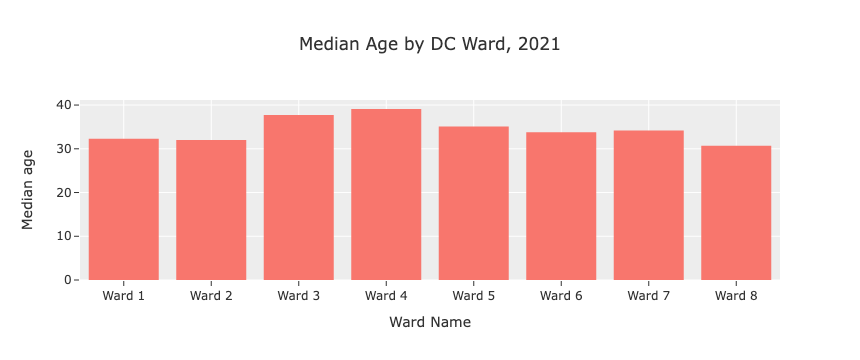

In [57]:
# plot median age by ward as a bar chart
fig = px.bar(demo_keep,
             x='Ward Name',
             y='Median age',
             title='Median Age by DC Ward, 2021',
             labels={
                 'WARD':'DC Ward'
             },
             template='ggplot2'
            )
fig.update_traces(marker_line_width=0)
fig.show()

This chart shows median age of residents per DC ward. There doesn't seem to be much variation here across wards. Wards 3 and 4 skew a little older while Ward 8 is the youngest on average. Let's map the percentage of people over 65 in each ward:

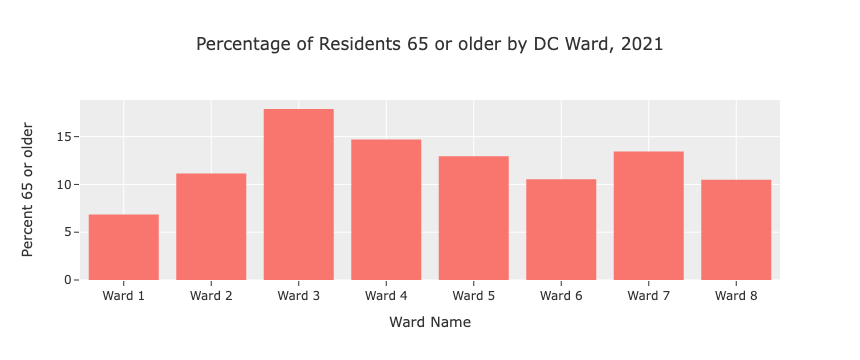

In [58]:
fig = px.bar(demo_keep,
             x='Ward Name',
             y='Percent 65 or older',
             title='Percentage of Residents 65 or older by DC Ward, 2021',
             labels={
                 'WARD':'DC Ward'
             },
             template='ggplot2'
            )
fig.update_traces(marker_line_width=0)
fig.show()

This chart tells us that while the share of elderly residents (above 65) in the overall population of each low remains low across wards, there are still significant numbers of seniors in each ward who will need access to grocery stores and food. Ward 3 has the highest elderly population at over 15%.

## Demographic summary

Overall, Wards 7 and 8 have the lowest median household incomes, both under 82,285 dollars. These wards also have the highest concentrations of black populations in D.C. wards. These ward populations are over 75% black. Converseley, Wards 2, 3, and 6 have the highest white populations, with 50-75% white populations. These largely white wards also have the highest median household incomes: Wards 2 and 3 have median household incomes above 198,291 dollars. Ward 6 is just below, with a median household income above $120,954 (in the second highest income category). There are small, but evenly dispersed, asian and hispanic/latino populations- all wards have less than 25% of total ward populations for both asian and hispanic/latino. Ward 4 has the highest median age, but Ward 3 (a white, high income ward) has the highest concentration of elderly folks (65 or older) at just shy of 18%. 

Importantly, there is a clear divide between east and west, with Wards 7 and 8 in the east being predominantly black and lowest income, while in the west, Wards 2, 3, and even 6 have very high incomes and large white populations. 

## NB viewer link:
https://nbviewer.org/github/rseiberg/food_access_dc/blob/main/Group%20Assignments/Week%207/Part%201%20race.ipynb